## Regresión lineal con librerías

### Eliminación de rasgos recursiva

> Las variables de menor peso son eliminadas hasta conseguir las variables asignadas

In [6]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## cargamos el csv
data=pd.read_csv("archivos/publicidad.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
## columnas con las variables predictorias
features_col=["TV", "Radio", "Newspaper"]

In [14]:
## creamos dos datasets uno con informacion de las variables predictoras
## y un dataset con la información a predecir
x=data[features_col]
y=data["Sales"]

In [19]:
estimador=SVR(kernel="linear")
## me quiero quedar con dos variables, step=en cuantos pasos será el procedimiento
selector=RFE(estimador, n_features_to_select=2, step=1)
## datasets a ocupar
selector=selector.fit(x,y)

In [37]:
## para saber cuales son los resultado de las variables, nos regresa un array de falsos y verdaderos
## que se pueden contraponer al array de variables
## ["TV", "Radio", "Newspaper"]
selector.support_

array([ True,  True, False])

In [39]:
## saber la sicnificatividad de las variables, se ordenan de acuerdo a que tan sicnificantes son el modelo
selector.ranking_

array([1, 1, 2])

In [41]:
## importamos la librería para el modelo
from sklearn.linear_model import LinearRegression

In [42]:
## dataset solo con las variables que necesitamos
x_pred=x[["TV", "Radio"]]

In [43]:
## creamos el modelo
lm=LinearRegression()
## dataset de variables a ocupar, dataset de variable a predecir 
lm.fit(x_pred, y)

LinearRegression()

In [44]:
## obtener el valor de la interseccion, alfa
lm.intercept_

2.9210999124051362

In [45]:
## obtener los otros valores los coeficientes
lm.coef_

array([0.04575482, 0.18799423])

In [46]:
## creamos nuestro modelo
## ventas=lm.intercept_+lm.coef_[0]TV+lm.coef_[1]Radio

In [49]:
## obtener el r cuadrado ajustado
lm.score(x_pred, y)

0.8971942610828956

In [50]:
ventas_predichas=lm.intercept_+(lm.coef_[0]*x_pred["TV"])+(lm.coef_[1]*x_pred["Radio"])
ventas_predichas

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

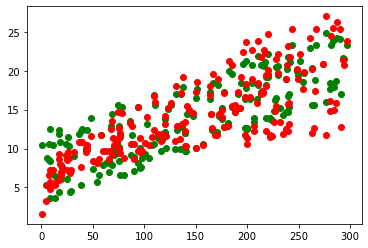

In [52]:
%matplotlib inline
plt.plot(x_pred["TV"], ventas_predichas, "go")
plt.plot(x_pred["TV"], y, "ro")